# EDA

In [1]:
## Décommenter la ligne suivante si ipywidgets n'est pas installé

#!pip install ipywidgets

In [2]:
import pandas as pd
import numpy as np
from ipywidgets import interact, Dropdown
import seaborn as sns
from matplotlib import pyplot as plt

path = "data_tmp/bakery_sales_reduit.csv"
df = pd.read_csv(path, sep=',').drop(columns=['Unnamed: 0'])
df.head()

,date,time,ticket_number,article,Quantity,unit_price
0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €"
1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €"
2,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €"
3,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €"
4,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €"


In [3]:
print(df.dtypes)

date              object
time              object
ticket_number    float64
article           object
Quantity         float64
unit_price        object
dtype: object


Let's convert all of the columns in the right format.

In [4]:
#@df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
#df['time'] = pd.to_datetime(df['time'], format='%H:%M').dt.time
df['unit_price']=df['unit_price'].str.replace(' €', '').str.replace(',', '.').astype(float)
df.dtypes

date              object
time              object
ticket_number    float64
article           object
Quantity         float64
unit_price       float64
dtype: object

In [5]:
df['Date']=pd.to_datetime(df['date'] + df['time'], format='%Y-%m-%d%H:%M')
df.drop(columns=['date', 'time'], inplace=True)
df.head()

,ticket_number,article,Quantity,unit_price,Date
0,150040.0,BAGUETTE,1.0,0.90,2021-01-02 08:38:00
1,150040.0,PAIN AU CHOCOLAT,3.0,1.20,2021-01-02 08:38:00
2,150041.0,PAIN AU CHOCOLAT,2.0,1.20,2021-01-02 09:14:00
3,150041.0,PAIN,1.0,1.15,2021-01-02 09:14:00
4,150042.0,TRADITIONAL BAGUETTE,5.0,1.20,2021-01-02 09:25:00


In [6]:
df.describe()

,ticket_number,Quantity,unit_price,Date
count,232622.000000,232622.000000,232622.000000,232622
mean,219190.900895,1.539983,1.649702,2021-11-30 22:10:28.928562176
min,150040.000000,-200.000000,0.000000,2021-01-02 08:38:00
25%,184711.250000,1.000000,1.100000,2021-07-03 10:27:00
50%,218805.500000,1.000000,1.200000,2021-11-04 11:54:00
75%,253944.750000,2.000000,1.500000,2022-05-31 10:20:30
max,288913.000000,200.000000,60.000000,2022-09-30 18:56:00
std,40060.433025,1.291976,1.698933,NaN


### Quantity column

In [7]:
df[df['Quantity']<0]

,ticket_number,article,Quantity,unit_price,Date
447,150265.0,BAGUETTE,-1.0,0.90,2021-01-03 10:41:00
1160,150738.0,SPECIAL BREAD,-1.0,2.40,2021-01-05 19:00:00
1161,150738.0,DIVERS PATISSERIE,-1.0,6.00,2021-01-05 19:00:00
1162,150738.0,DIVERS BOULANGERIE,-1.0,2.00,2021-01-05 19:00:00
1464,150941.0,COUPE,-1.0,0.15,2021-01-08 11:58:00
...,...,...,...,...,...
231676,288312.0,COUPE,-2.0,0.15,2022-09-27 18:03:00
231677,288312.0,TRADITIONAL BAGUETTE,-1.0,1.30,2022-09-27 18:03:00
231678,288312.0,CEREAL BAGUETTE,-3.0,1.35,2022-09-27 18:03:00
232173,288639.0,BOISSON 33CL,-1.0,1.50,2022-09-29 11:55:00


Here we notice that some rows have negative values, which is a problem. Let's just make them positive as it's surely is a simple input mistake.

In [8]:
df['Quantity']=np.where(df['Quantity']<0, -df['Quantity'], df['Quantity'])

### Article Column

In [9]:
narticle = df['article'].nunique()

print(f"There are {narticle} different articles in the dfbase. ")

There are 71 different articles in the dfbase. 


In [10]:
count_article = df['article'].value_counts()
count_article

article
TRADITIONAL BAGUETTE    67689
COUPE                   20470
BAGUETTE                15365
BANETTE                 15130
CROISSANT               11508
                        ...  
VIENNOISE                 183
DEMI PAIN                 163
PALET BRETON              156
MACARON                   132
BOTTEREAU                  85
Name: count, Length: 71, dtype: int64

Text(0, 0.5, 'Number of articles')

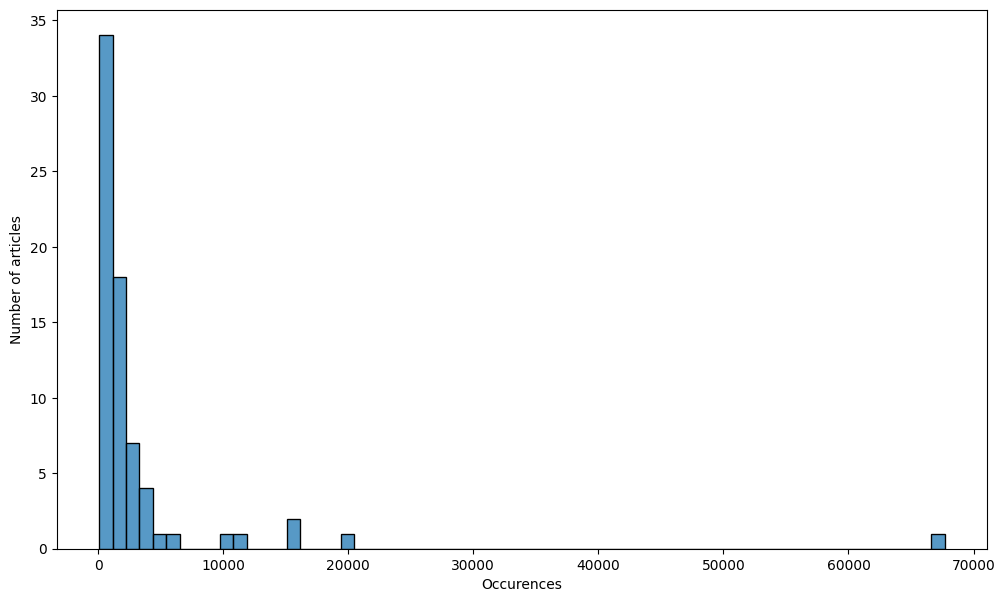

In [11]:
plt.figure(figsize=(12,7))
sns.histplot(count_article)
plt.xlabel('Occurences')
plt.ylabel('Number of articles')

Let's use the log scale for a better understanding

Text(0, 0.5, 'Number of articles')

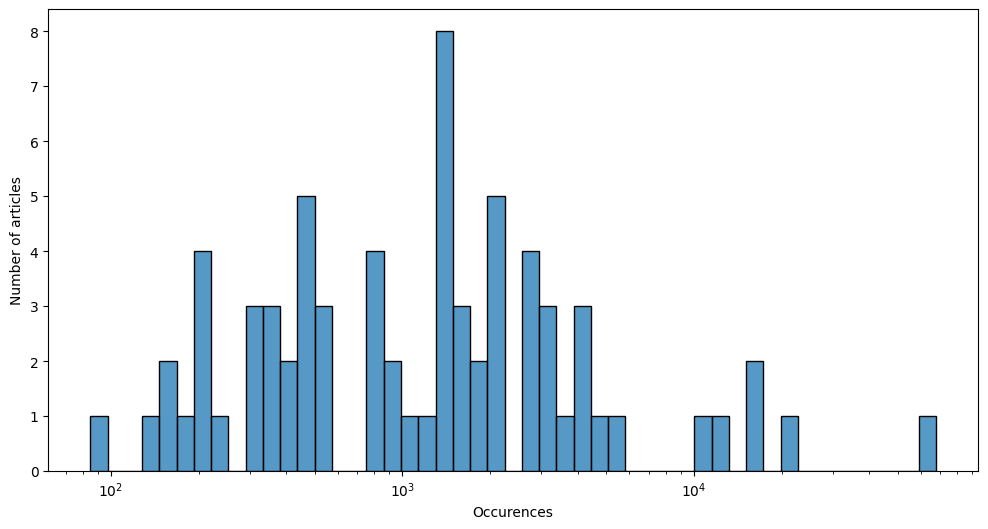

In [12]:
plt.figure(figsize=(12,6))
sns.histplot(count_article, log_scale=True, bins=49)
plt.xlabel('Occurences')
plt.ylabel('Number of articles')

In [13]:
variation = (
    df.groupby('article')['unit_price'].agg(['nunique', 'var'])
      .reset_index()
)

variation['constant'] = variation['nunique'] == 1

articles_constants = variation.loc[variation['constant'], 'article'].tolist()
articles_variables = variation.loc[~variation['constant'], 'article'].tolist()

print(f"Il y'a {len(articles_constants)} articles dont le prix est constant dans le temps et {len(articles_variables)} articles dont le prix évolut dans le temps.")

def afficher_prix(article):
    subset = df[df['article'] == article].sort_values('Date')

    plt.figure(figsize=(12, 6))
    plt.plot(subset['Date'], subset['unit_price'], marker='o', label='Prix réel')

    # 🔹 Ajouter une tendance linéaire
    x = np.arange(len(subset))
    y = subset['unit_price'].values
    coef = np.polyfit(x, y, 1)  # Ajuste une droite
    tendance = np.poly1d(coef)
    plt.plot(subset['Date'], tendance(x), color='red', linestyle='--', label='Tendance générale')

    plt.title(f"Évolution du prix - {article}")
    plt.xlabel("Date d'achat")
    plt.ylabel("Prix")
    plt.grid(True)
    plt.legend()
    plt.show()

def explorer_articles(groupe):
    if groupe == 'VARIABLES':
        options = articles_variables
    else:
        options = articles_constants

    if not options:
        print(f"Aucun article {groupe.lower()} trouvé.")
        return

    interact(afficher_prix, article=Dropdown(options=options, description='Article'))

# --- 4️⃣ Interface principale ---
interact(explorer_articles, groupe=['VARIABLES', 'CONSTANTS'])

Il y'a 10 articles dont le prix est constant dans le temps et 61 articles dont le prix évolut dans le temps.


interactive(children=(Dropdown(description='groupe', options=('VARIABLES', 'CONSTANTS'), value='VARIABLES'), O…

<function __main__.explorer_articles(groupe)>

### Unit_price column

In [14]:
df['unit_price'].value_counts()

unit_price
1.20     49080
0.15     20471
1.30     19778
1.25     18923
1.10     11933
         ...  
11.10        1
14.65        1
23.60        1
8.60         1
30.00        1
Name: count, Length: 123, dtype: int64

In [15]:
kmean = df[['article', 'unit_price']].groupby('article').mean().reset_index()
kmean = kmean.sort_values(by='unit_price')
kmean

,article,unit_price
17,COUPE,0.150000
63,SUCETTE,0.300000
20,DEMI BAGUETTE,0.470367
5,BOTTEREAU,0.500000
39,GRANDE SUCETTE,0.600000
...,...,...
56,ROYAL,8.481481
67,TRAITEUR,8.549183
35,GALETTE FRANGIPANE,9.501538
36,GALETTE FRUIT,9.608040


In [16]:
kmean[kmean['unit_price']<1]

,article,unit_price
17,COUPE,0.150000
63,SUCETTE,0.300000
20,DEMI BAGUETTE,0.470367
5,BOTTEREAU,0.500000
39,GRANDE SUCETTE,0.600000
28,FICELLE,0.627966
3,BANETTINE,0.631576
21,DEMI PAIN,0.644479
0,BAGUETTE,0.946079


## Tickets DataFrame


The tickets DataFrame is grouped by the ticket_number and the date of the purchase.

In [17]:
df['total'] = df['unit_price'] * df['Quantity']

In [18]:
tickets = df[['ticket_number', 'article', 'total','Quantity', 'Date']].groupby(['ticket_number', 'Date']).agg({'article':'count', 'Quantity':'sum', 'total':'sum'}).reset_index()
tickets

,ticket_number,Date,article,Quantity,total
0,150040.0,2021-01-02 08:38:00,2,4.0,4.50
1,150041.0,2021-01-02 09:14:00,2,3.0,3.55
2,150042.0,2021-01-02 09:25:00,1,5.0,6.00
3,150043.0,2021-01-02 09:25:00,2,5.0,5.10
4,150044.0,2021-01-02 09:27:00,1,1.0,1.05
...,...,...,...,...,...
136324,288908.0,2022-09-30 18:34:00,1,2.0,2.70
136325,288910.0,2022-09-30 18:39:00,1,1.0,1.30
136326,288911.0,2022-09-30 18:52:00,5,11.0,12.15
136327,288912.0,2022-09-30 18:55:00,1,1.0,1.30


In [19]:
tickets.describe()

,ticket_number,Date,article,Quantity,total
count,136329.000000,136329,136329.000000,136329.000000,136329.000000
mean,219387.942800,2021-12-01 20:21:21.640736768,1.706328,2.659860,4.110259
min,150040.000000,2021-01-02 08:38:00,1.000000,1.000000,0.000000
25%,184668.000000,2021-07-03 09:25:00,1.000000,1.000000,1.300000
50%,219198.000000,2021-11-06 10:11:00,1.000000,2.000000,2.500000
75%,254169.000000,2022-06-01 11:01:00,2.000000,3.000000,5.050000
max,288913.000000,2022-09-30 18:56:00,12.000000,200.000000,200.000000
std,40090.895407,NaN,1.025569,2.417448,4.384962


Text(0, 0.5, 'Nombre de tickets')

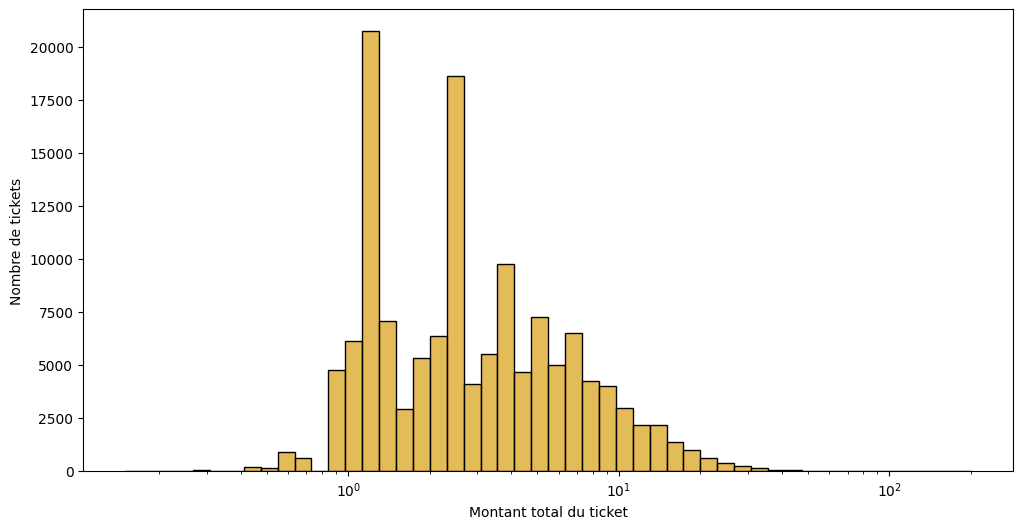

In [20]:
plt.figure(figsize=(12,6))
sns.histplot(tickets['total'], bins=50, log_scale=True, color='goldenrod')
plt.xlabel('Montant total du ticket')
plt.ylabel("Nombre de tickets")

## Premières etudes sur le temps

### on sépare les différents temps (mois, annee, heure)

In [21]:
tickets['annee'] = tickets['Date'].dt.year
tickets['mois'] = tickets['Date'].dt.month
tickets['jour_semaine'] = tickets['Date'].dt.day_name()
tickets['heure'] = tickets['Date'].dt.hour

tickets

,ticket_number,Date,article,Quantity,total,annee,mois,jour_semaine,heure
0,150040.0,2021-01-02 08:38:00,2,4.0,4.50,2021,1,Saturday,8
1,150041.0,2021-01-02 09:14:00,2,3.0,3.55,2021,1,Saturday,9
2,150042.0,2021-01-02 09:25:00,1,5.0,6.00,2021,1,Saturday,9
3,150043.0,2021-01-02 09:25:00,2,5.0,5.10,2021,1,Saturday,9
4,150044.0,2021-01-02 09:27:00,1,1.0,1.05,2021,1,Saturday,9
...,...,...,...,...,...,...,...,...,...
136324,288908.0,2022-09-30 18:34:00,1,2.0,2.70,2022,9,Friday,18
136325,288910.0,2022-09-30 18:39:00,1,1.0,1.30,2022,9,Friday,18
136326,288911.0,2022-09-30 18:52:00,5,11.0,12.15,2022,9,Friday,18
136327,288912.0,2022-09-30 18:55:00,1,1.0,1.30,2022,9,Friday,18


#### on voit l'influence du jour de la semaine sur le montant total des tickets

<Axes: xlabel='jour_semaine'>

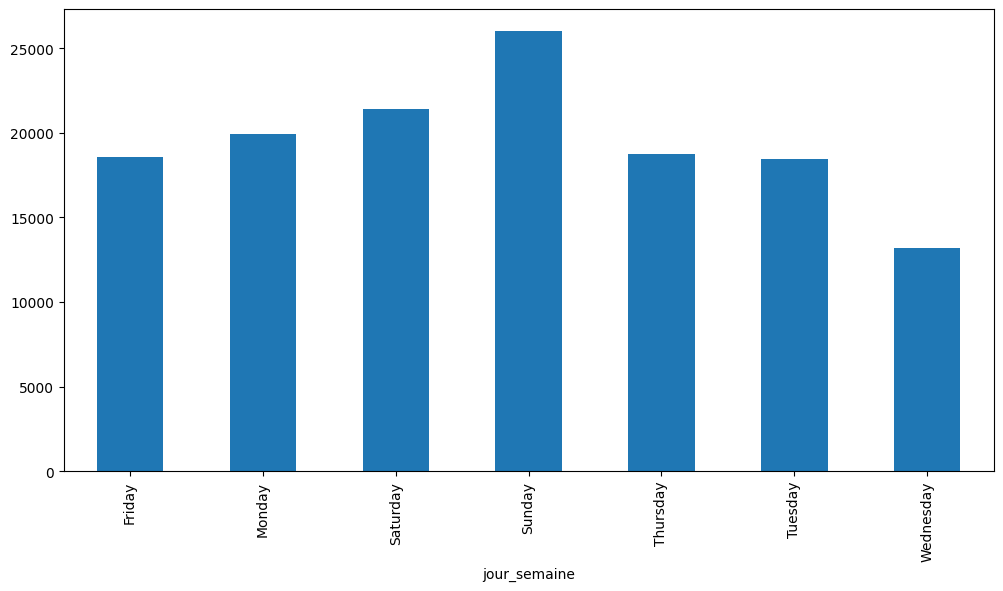

In [22]:
plt.figure(figsize=(12, 6))
tickets.groupby('jour_semaine')['total'].count().plot(kind='bar')


#### On resample la df tickets en fonction de la saisonnalité souhaitée

In [23]:
tickets_d = tickets.resample('D', on='Date').count()
tickets_d

,ticket_number,article,Quantity,total,annee,mois,jour_semaine,heure
Date,,,,,,,,
2021-01-02,184,184,184,184,184,184,184,184
2021-01-03,219,219,219,219,219,219,219,219
2021-01-04,143,143,143,143,143,143,143,143
2021-01-05,150,150,150,150,150,150,150,150
2021-01-06,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
2022-09-26,195,195,195,195,195,195,195,195
2022-09-27,216,216,216,216,216,216,216,216
2022-09-28,178,178,178,178,178,178,178,178


In [24]:
weekly_tickets = tickets.resample('W', on='Date').count()
weekly_tickets

,ticket_number,article,Quantity,total,annee,mois,jour_semaine,heure
Date,,,,,,,,
2021-01-03,403,403,403,403,403,403,403,403
2021-01-10,921,921,921,921,921,921,921,921
2021-01-17,869,869,869,869,869,869,869,869
2021-01-24,856,856,856,856,856,856,856,856
2021-01-31,870,870,870,870,870,870,870,870
...,...,...,...,...,...,...,...,...
2022-09-04,1382,1382,1382,1382,1382,1382,1382,1382
2022-09-11,1397,1397,1397,1397,1397,1397,1397,1397
2022-09-18,1355,1355,1355,1355,1355,1355,1355,1355


In [25]:
monthly_tickets = tickets.resample('ME', on='Date').count()
monthly_tickets

,ticket_number,article,Quantity,total,annee,mois,jour_semaine,heure
Date,,,,,,,,
2021-01-31,3919,3919,3919,3919,3919,3919,3919,3919
2021-02-28,4463,4463,4463,4463,4463,4463,4463,4463
2021-03-31,5381,5381,5381,5381,5381,5381,5381,5381
2021-04-30,6486,6486,6486,6486,6486,6486,6486,6486
2021-05-31,6841,6841,6841,6841,6841,6841,6841,6841
2021-06-30,6526,6526,6526,6526,6526,6526,6526,6526
2021-07-31,9995,9995,9995,9995,9995,9995,9995,9995
2021-08-31,11394,11394,11394,11394,11394,11394,11394,11394
2021-09-30,6195,6195,6195,6195,6195,6195,6195,6195


In [26]:
hourly_tickets = tickets.resample('h', on='Date').count()
hourly_tickets

,ticket_number,article,Quantity,total,annee,mois,jour_semaine,heure
Date,,,,,,,,
2021-01-02 08:00:00,1,1,1,1,1,1,1,1
2021-01-02 09:00:00,15,15,15,15,15,15,15,15
2021-01-02 10:00:00,30,30,30,30,30,30,30,30
2021-01-02 11:00:00,43,43,43,43,43,43,43,43
2021-01-02 12:00:00,66,66,66,66,66,66,66,66
...,...,...,...,...,...,...,...,...
2022-09-30 14:00:00,0,0,0,0,0,0,0,0
2022-09-30 15:00:00,2,2,2,2,2,2,2,2
2022-09-30 16:00:00,20,20,20,20,20,20,20,20


#### On compare les ventes mensuelles par année 

<Axes: xlabel='mois', ylabel='total'>

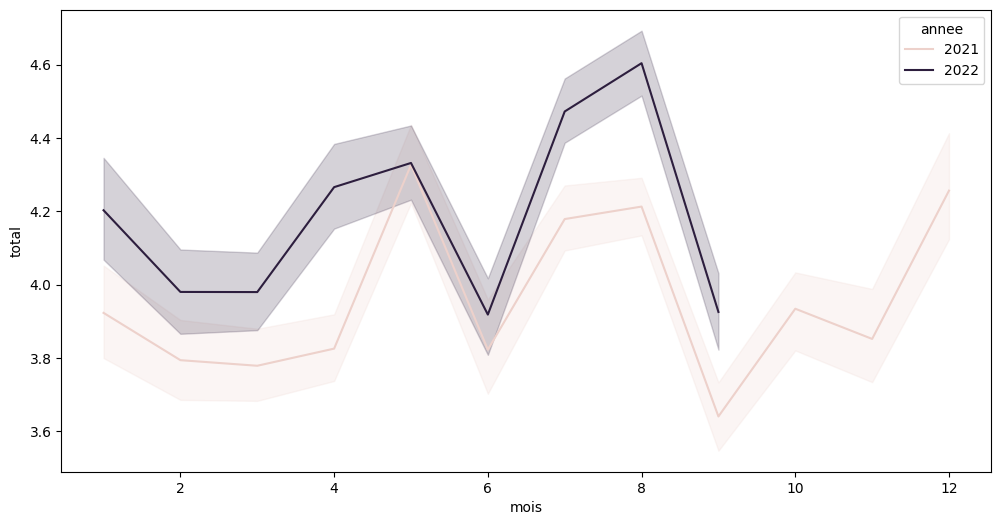

In [27]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='mois', y='total', hue='annee', data=tickets)

<Axes: xlabel='heure', ylabel='total'>

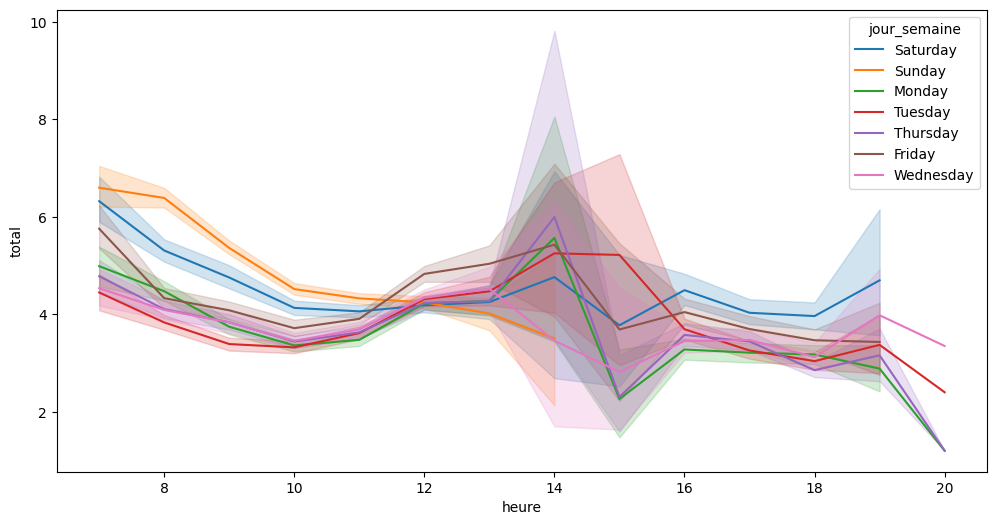

In [28]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='heure', y='total', hue='jour_semaine', data=tickets)

<Axes: xlabel='Date', ylabel='ticket_number'>

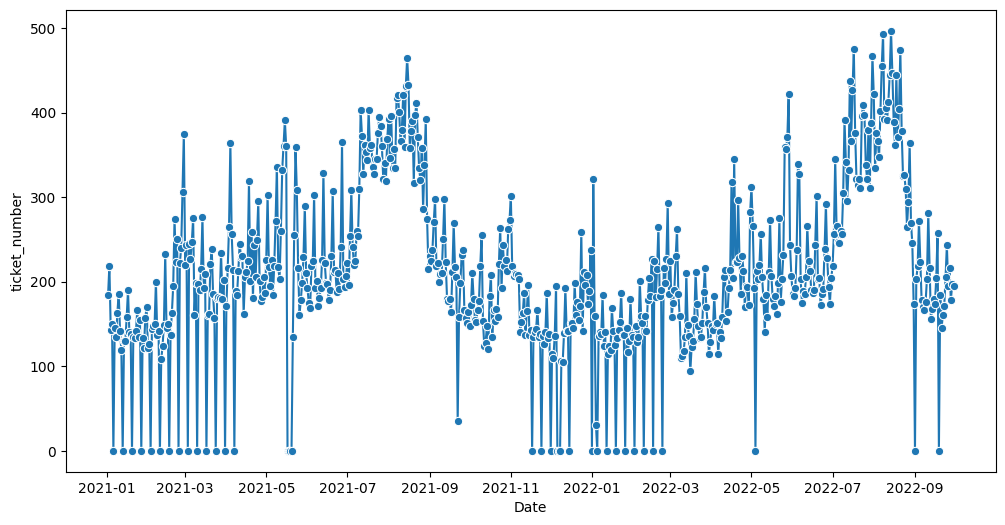

In [29]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='ticket_number', data=tickets_d, marker='o')

<Axes: xlabel='Date', ylabel='ticket_number'>

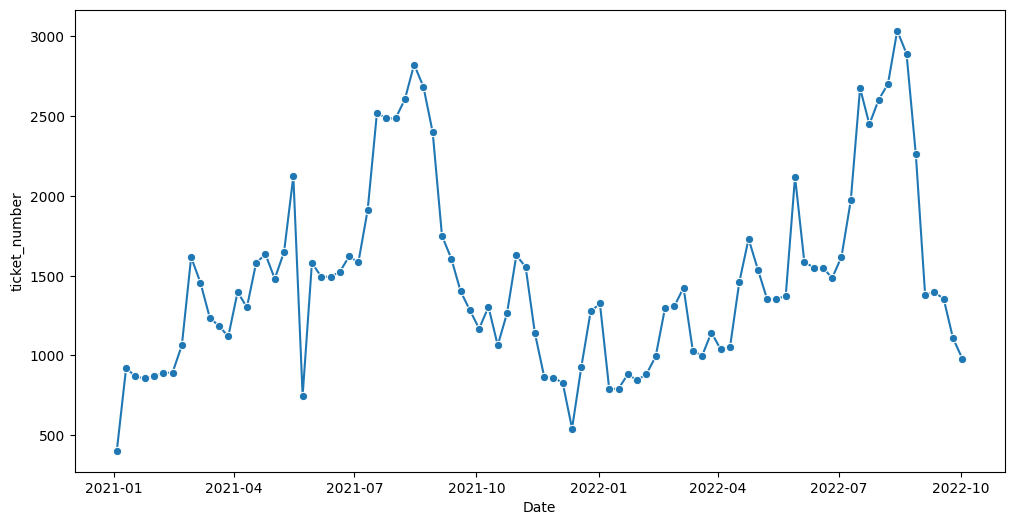

In [30]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='ticket_number', data=weekly_tickets, marker='o')

<Axes: xlabel='Date', ylabel='ticket_number'>

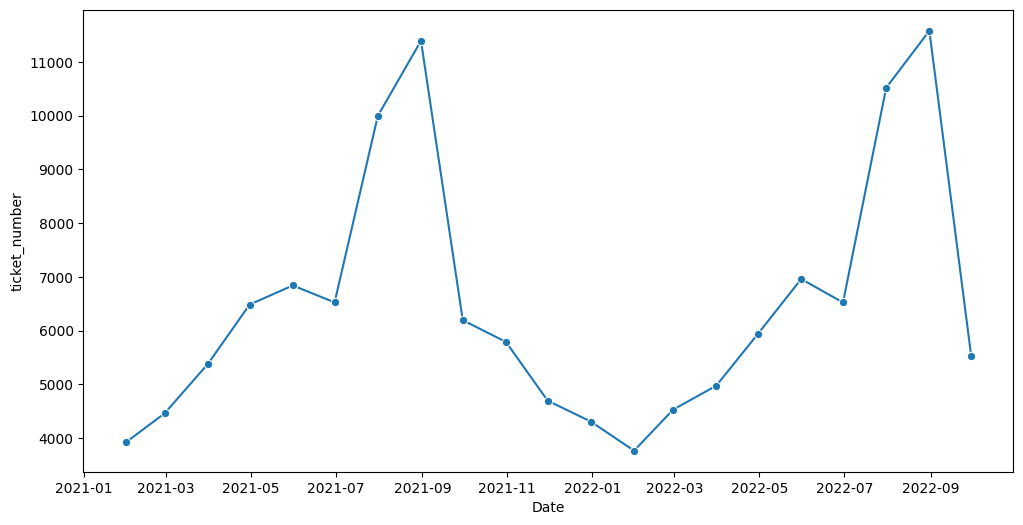

In [31]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='ticket_number', data=monthly_tickets, marker='o')

Ici on cherche à trouver le nombre total de produit vendu (nb d'occurences * la qtt achetée à chaque achat)

In [32]:
res = (
    df.groupby('article', as_index=False)['Quantity']
      .sum()
      .rename(columns={'Quantity': 'qte_totale'})
)

res.sort_values(by='qte_totale', ascending=False)

,article,qte_totale
66,TRADITIONAL BAGUETTE,118723.0
18,CROISSANT,29990.0
47,PAIN AU CHOCOLAT,25498.0
17,COUPE,23697.0
2,BANETTE,23008.0
...,...,...
14,CHOU CHANTILLY,271.0
25,DIVERS SANDWICHS,241.0
69,VIENNOISE,218.0
36,GALETTE FRUIT,202.0


In [33]:
df['article'].value_counts()

article
TRADITIONAL BAGUETTE    67689
COUPE                   20470
BAGUETTE                15365
BANETTE                 15130
CROISSANT               11508
                        ...  
VIENNOISE                 183
DEMI PAIN                 163
PALET BRETON              156
MACARON                   132
BOTTEREAU                  85
Name: count, Length: 71, dtype: int64